In [30]:
## On Average Takes around 12 minutes 
import os

!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py

fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!. ${FSLDIR}/etc/fslconf/fsl.sh

!flirt -version 

file is already the newest version (1:5.32-2ubuntu0.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
--2022-07-25 13:57:48--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.65
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103840 (101K) [application/octet-stream]
Saving to: ‘fslinstaller.py.1’

fslinstaller.py.1   100%[===================>] 101.41K   371KB/s    in 0.3s    

2022-07-25 13:57:49 (371 KB/s) - ‘fslinstaller.py.1’ saved [103840/103840]

--- FSL Installer - Version 3.2.3 ---
When asked a question, the default answer is given in square brackets.
Hit the Enter key to accept this default answer.
Where would you like the FSL install to be (including the FSL 

In [ ]:
## Takes a bit time to read the kaggle . json file 
!pip install kaggle --upgrade
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir content/data
!kaggle datasets download -d lyfeisgood/something
!unzip /content/something.zip -d data
!pip install regtricks

In [1]:
import os
import re
import nibabel as nib
import numpy as np
import torch
print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import torch
import regtricks
## Import my .py file ....... 
import Data_Loader as dl
# import Models as model
import regtricks as rt

1.12.0+cu113
True
1.12.0+cu113
True
cuda:0


In [2]:
## Defining the path of the data 
x,y = dl.data_loader('/content/data','/content/data',device)

## Printing the shape of specifid data
print('\nShape of MRI images - >');     dl.print_data_shape(x); 
print('\nShape of ASL images - >');     dl.print_data_shape(y);

## Printing the Stats of the data
print('\nStats for MRI data(X) - >');   dl.tensor_stats(x); 
print('\nStats for ASL data(X) - >');   dl.tensor_stats(y);

## Printing the Dimension of X and Y  
## Dimension refer -> Number x Length x Breadth x Height x Channel
print('\nDimensions of X(MRI Data) ->',end=' '); dl.print_data_dimension(x)
print('\nDimensions of Y(ASL Data) ->',end=' '); dl.print_data_dimension(y)


Shape of MRI images - >
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])
torch.Size([1, 182, 218, 182])

Shape of ASL images - >
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])

Stats for MRI data(X) - >
tensor(720091.3750) tensor(-0.) tensor(0.0997) tensor(0.1259)
tensor(766433.0625) tensor(0.) tensor(0.1061) tensor(0.1197)
tensor(910082.3125) tensor(0.) tensor(0.1260) tensor(0.1682)
tensor(636053.1875) tensor(0.) tensor(0.0881) tensor(0.1086)
tensor(767731.0625) tensor(-0.) tensor(0.1063) tensor(0.1298)
tensor(867351.) 

In [ ]:
# BaseLine = model.get_model('BaseLine',1)
# model.get_summary(BaseLine)

In [ ]:
# import regtricks as rt
# str2asl_reg=rt.flirt(src=x[0],ref=y[0])
# xD=str2asl_reg.apply_to_image(x[0],ref=y[0])

In [28]:
def data_prep(mri_data_dict,asl_data_dict,device):
    '''
    Params - Dictionary of MRI Data, ASL data and the device to which the tensors are stored
    Result - Creates tensors from the data dictionary feeded
    '''
    x = [] ; y = []; X = []; Y = [];
    for k,v in mri_data_dict.items():
        if k in asl_data_dict:
            # Loading the MRI image from the path in the train x path 
            mri_img_x = nib.load(v); asl_img = nib.load(asl_data_dict[k]); str2asl_reg=rt.flirt(src=mri_img_x,ref=asl_img)
            mri_img =  str2asl_reg.apply_to_image(mri_img_x,ref=asl_img)
            # Making it a numpy array
            mri_vec = np.array(mri_img.dataobj)[np.newaxis,:,:,:] # Channels x Length X Breadth X Slices of Brain
            # Min max Normalizing the image 
            mri_vec = (mri_vec - mri_vec.min()) / (mri_vec.max() - mri_vec.min())
            # Appending the MRI image to X 
            x.append(torch.as_tensor(mri_vec,dtype=torch.float32));#.to(device)); 
            ## Finding the same patient with ASL data 
            asl_img = nib.load(asl_data_dict[k]); asl_vec = np.array(asl_img.dataobj)[np.newaxis,:,:,:]; 
            asl_vec = (asl_vec - asl_vec.min()) / (asl_vec.max() - asl_vec.min());
            ## Appending the image to y
            y.append(torch.as_tensor(asl_vec,dtype=torch.float32));#.to(device))
            X = torch.stack(x,dim=0)#.to(device);
            Y = torch.stack(y,dim=0)#.to(device);
    return X,Y

In [31]:
## Takes 4 minutes
mri,asl = dl.create_data_dict(dl.get_mri_data('/content/data'),dl.get_asl_data('/content/data'))
x,y = data_prep(mri,asl,device)

(1, 91, 109, 91)
<class 'numpy.ndarray'>


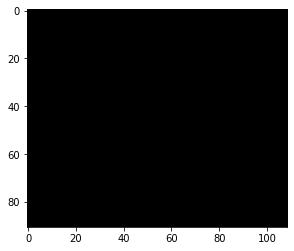

In [38]:
# dl.print_data_dimension(x); dl.print_data_dimension(y);

x_first = x[0]
pred_np = x_first.cpu().detach().numpy()
dl.print_data_dimension(pred_np); print(type(pred_np))

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(0,x.shape[4]):
    ## For L2 Distance
    frames.append([plt.imshow(pred_np[0,:,:,i], cmap=cm.Greys_r,animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=120, blit=True, repeat_delay=1000)
ani.save('movie.mp4')


In [39]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/movie.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)